In [21]:
import skorch
import torch

# Getting the data

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def load_data(test_size=0.2):
    iris=load_iris()
    X=iris.data
    y=iris.target
    y_names = iris.target_names
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)
    X_train, y_train, X_test, y_test = map(
    torch.tensor, (X_train, y_train, X_test, y_test)
    )
    return X_train.float(),X_test.float(),y_train,y_test, y_names

def get_data_as_dataloaders(train_ds : TensorDataset, test_ds : TensorDataset, batch_size : int):
    return (
        DataLoader(train_ds, batch_size, shuffle=True),
        DataLoader(test_ds, batch_size=batch_size * 2),
    )



# Making the model

In [23]:

import torch.nn as nn       
import torch.nn.functional as F 

class IrisClassifier(nn.Module):
    
    def __init__(self):
        super(IrisClassifier, self).__init__()
        self.layer1 = nn.Linear(4, 120)
        self.layer2 = nn.Linear(120, 64)
        self.layer3 = nn.Linear(64, 12)
        self.layer4 = nn.Linear(12, 3)
        self.ReLU = nn.ReLU()
        
        
    def forward(self, x):
        z = self.ReLU(self.layer1(x))
        z = self.ReLU(self.layer2(z))
        z = self.ReLU(self.layer3(z))
        z = self.ReLU(self.layer4(z))
        z = F.softmax(z, dim=1)
        return z

In [24]:
# Found here : https://www.kaggle.com/code/mohitchaitanya/simple-iris-dataset-classification-using-pytorch

class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
            super(NeuralNetworkClassificationModel,self).__init__()
            self.input_layer    = nn.Linear(input_dim,128)
            self.hidden_layer1  = nn.Linear(128,64)
            self.output_layer   = nn.Linear(64,output_dim)
            self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [25]:
# Found here : https://janakiev.com/blog/pytorch-iris/

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        z = nn.ReLU(self.layer1(x))
        z = nn.ReLU(self.layer2(x))
        z = nn.ReLU(self.layer3(x))
        #x = F.softmax(self.layer3(x), dim=1)
        return z

# Calling the fit function

In [26]:
from skorch import NeuralNetClassifier
import torch

net = NeuralNetClassifier(
    module = Model,
    module__input_dim = 4,
    max_epochs=100,
    lr=0.001,
    batch_size=64,
    optimizer=torch.optim.Adam,
    criterion=torch.nn.CrossEntropyLoss,
)

net.fit(X,y)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x4 and 50x50)

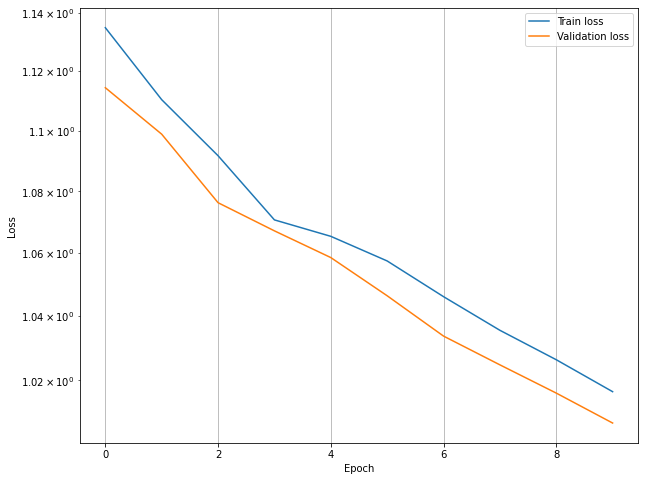

In [ ]:
import matplotlib.pyplot as plt


val_loss=[]
train_loss=[]
for i in range(10):
    val_loss.append(net.history[i]['valid_loss'])
    train_loss.append(net.history[i]['train_loss'])
    
plt.figure(figsize=(10,8))
plt.semilogy(train_loss, label='Train loss')
plt.semilogy(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()    